In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
61,62,15773469,Clark,687,Germany,Female,27,9,152328.88,2,0,0,126494.82,0
476,477,15798888,Pisano,605,Germany,Female,31,1,117992.59,1,1,1,183598.77,0
2022,2023,15761477,Golibe,501,Germany,Male,24,4,130806.42,2,1,0,80241.14,0
2697,2698,15699450,Li,723,France,Male,48,7,0.00,2,1,1,150694.58,0
9300,9301,15591628,Davies,701,Germany,Male,41,9,164046.10,1,1,0,49405.93,0
7609,7610,15796787,Vassiliev,681,France,Male,46,0,105969.42,1,1,0,5771.56,0
4102,4103,15772030,Coupp,662,Spain,Male,33,3,0.00,2,0,1,68064.83,0
5419,5420,15594456,K?,740,Spain,Female,56,4,99097.33,1,1,1,85016.64,1
384,385,15689294,Onyemaechi,705,Germany,Male,44,3,105934.96,1,1,0,82463.69,0
4637,4638,15639590,Melendez,758,France,Female,30,3,141581.08,1,1,0,156249.06,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5104,5105,15694349,Ngozichukwuka,714,Spain,Male,44,7,0.00,1,0,1,6923.11,0
5669,5670,15706706,Chinwendu,648,Germany,Male,33,7,135310.41,2,0,1,171668.20,0
7640,7641,15572361,Chill,790,Germany,Female,34,2,164011.48,1,1,0,199420.41,0
9685,9686,15644280,Udegbunam,593,France,Male,45,4,138825.19,1,0,0,10828.78,0
1276,1277,15690182,Kapustin,635,Germany,Male,37,5,113488.68,1,1,0,95611.74,1


In [10]:
df = df.iloc[:,3:]

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
df = pd.get_dummies(df,columns=['Geography', 'Gender'], drop_first=True)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


In [15]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9834,516,46,6,62212.29,1,0,1,171681.86,1,False,False,False
4386,783,42,2,139707.28,1,1,0,2150.22,0,True,False,False
9595,597,61,5,0.00,2,1,1,81299.17,0,False,False,True
4937,577,36,3,121092.47,2,0,1,143783.46,0,False,False,True
7187,552,38,9,134105.01,1,0,0,57850.10,0,False,False,False


In [16]:
X = df.drop(columns=['Exited'])

In [17]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [18]:
Y = df['Exited']

In [19]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest,  Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=42)

In [21]:
Xtest

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,596,32,3,96709.07,2,0,0,41788.37,True,False,True
4684,623,43,1,0.00,2,1,1,146379.30,False,False,True
1731,601,44,4,0.00,2,1,0,58561.31,False,True,False
4742,506,59,8,119152.10,2,1,1,170679.74,True,False,True
4521,560,27,7,124995.98,1,1,1,114669.79,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268.84,1,0,1,45038.29,True,False,False
8285,609,25,10,0.00,1,0,1,109895.16,False,False,True
7853,730,47,7,0.00,1,1,0,33373.26,False,False,False
1095,692,29,4,0.00,1,1,0,76755.99,False,False,True


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
XtrainScaled= scaler.fit_transform(Xtrain)


In [25]:
XtestScaled = scaler.transform(Xtest)

In [26]:
XtrainScaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [27]:
import tensorflow

2025-01-20 19:53:39.109464: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-20 19:53:39.125331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737383019.144932   19878 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737383019.150702   19878 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 19:53:39.170275: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [28]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense


In [29]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [30]:


model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='relu'))



/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1737383021.732856   19878 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1233 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [31]:


model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(XtrainScaled,Ytrain ,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100


I0000 00:00:1737383023.542497   21565 service.cc:148] XLA service 0x7f5280005b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737383023.542530   21565 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-01-20 19:53:43.569477: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
E0000 00:00:1737383023.696800   21565 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1737383023.722548   21565 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but s

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib64/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib64/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib64/python3.11/asyncio/events.py", line 84, in _run

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_19878/3280116636.py", line 1, in <module>

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_1308]

In [64]:
y_pred = model.predict(Xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step


In [67]:
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [68]:
y_pred = y_pred.argmax(axis=-1)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest,y_pred)

InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got np.int64(0) instead.

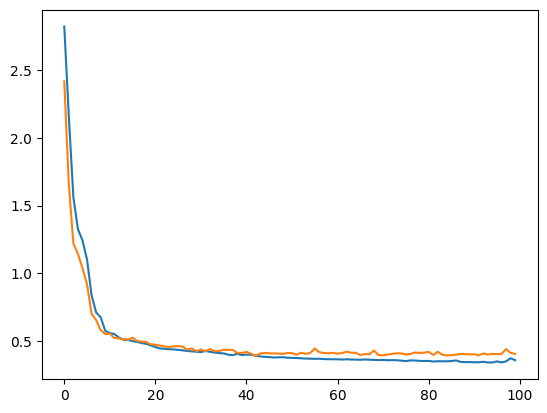

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

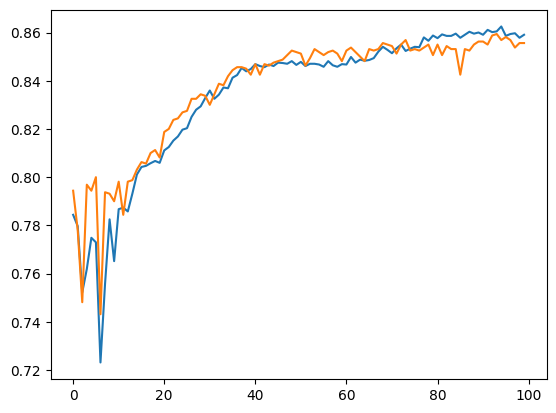

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


In [2]:
import tensorflow as tf

assert tf.test.is_gpu_available()
assert tf.test.is_built_with_cuda()

2025-01-12 00:45:22.637723: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-12 00:45:22.970896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736622923.192507   11746 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736622923.245767   11746 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-12 00:45:23.526379: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


I0000 00:00:1736622932.464674   11746 gpu_device.cc:2022] Created device /device:GPU:0 with 2034 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
print("Num GPUs Available: ", (tf.config.list_physical_devices('GPU')))

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
import torch

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'